<div style="float: right;">
<img hr width="40%" src="http://static.wixstatic.com/media/d90f6c_6e807fca36354d06b524167b040d3315.jpg_srz_p_221_241_75_22_0.50_1.20_0.00_jpg_srz">
</div>
<h1>FFTex</h1>
<i>intro FFT topics with Python</i>     

---
<h3>Description:</h3>
The purpose of this notebook is to illustrate some basic principles of the Fast Fourier Transform (FFT). The first example (FFTex1) just lets you specify the requisite parameters to build/plot a simple sinusoid. The second example (FFTex2) allows you to specify the number of harmonics to include in the approximation of a square wave, and visualizes the square wave along with its truncated approximation.Finally, the third example (FFTex3) illustrates the concept of aliasing by visualizing what happens when a sinusoid of a given frequency is sampled at different rates.
 


<h3>Notes:</h3>
Because I learned Matlab before python, I love the matplotlib.pyplot module, since it was designed to behave similarly in many respects to Matlab's plotting engine.
   
   
<h4>By Sam Thorpe</h4>
<i>Written November 03, 2015</i>  

    
---


In [2]:
# # Module Imports
# -----------------------------------------------------|
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline  

<h2>FFTex1</h2>
<i>computes/plots simple sinusoid and spectrum</i>     

---
<h4>Description:</h4>
This function takes as input a set of parameters which characterize a simple sinusoid and returns plots of the corresponding series and spectrum.   


<h4>Inputs:</h4>
f: frequency    
N: number of seconds    
A: Amplitude of sinusoid    
theta: phase of sinusoid (radians)    
sr: sampling rate (Hz)    
maxf: max frequency to display in plot (Hz)    

 
<h4>Outputs:</h4>
plots of time series and amplitude spectrum

  
<h4>Notes:</h4>
Examples of usage:    
FFTex1(1,1,2,0,1000,10); returns a 1 Hz sine wave plotted over 1 sec with an amplitude of 2, no phase shift, with 1000 Hz sampling.      

---

In [9]:
def FFTex1(*arg):
    '''computes/plots simple sinusoid and spectrum'''

    # # Parse Inputs 
    # -----------------------------------------------------|
    f, N, A, theta, sr, maxf = arg

    # # compute time series and spectrum
    # -----------------------------------------------------|
    t = np.r_[0:N:1./sr]
    y = A*np.sin(2.*np.pi*f*t + theta)
    yF = np.fft.fft(y)/len(y)
    df = sr/len(yF)
    freqs = np.r_[0:sr:df] 
    yS = np.abs(yF)
    yT = np.angle(yF)

    # # Plots
    # -----------------------------------------------------|

    # # plot time series
    plt.figure(1)
    plt.rc('font', **{'weight':'bold','size':15})
    plt.plot([0,N],[0,0],linewidth=3,linestyle='--',color=[0.65, 0.65, 0.65])
    ytmp = A*np.sin(2.*np.pi*f*t)
    plt.plot(t,ytmp,linewidth=2,linestyle='--',color=[0.25, 0.25, 0.25]) 
    plt.plot(t,y,linewidth=3,color='b')
    plt.xlabel('Time (sec)',fontweight='bold',fontsize=15)
    plt.ylabel('Amplitude',fontweight='bold',fontsize=15)
    plt.title('%i Hz sinusoid: Time Series' %f ,fontweight='bold',fontsize=17)
    plt.grid('on');
    plt.axis([0, N, -A, A])

    # # plot spectrum
    plt.figure(2)
    plt.bar(freqs,yS,align='center')
    plt.rc('font', **{'weight':'bold','size':15})
    plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=15)
    plt.ylabel('Amplitude',fontweight='bold',fontsize=15)
    plt.title('%i Hz sinusoid: Amplitude Spectrum' %f ,fontweight='bold',fontsize=17)
    plt.grid(True)
    plt.axis([0, maxf, 0, A])
    
    plt.show()


<h3>Pass parameters and call FFTex1 ...</h3>

---
Pretty decent introductory example... If you understand every detail of this example alone, then you have a pretty good grasp of the very basic principles of the FFT. Play around with each of the parameters below.

---


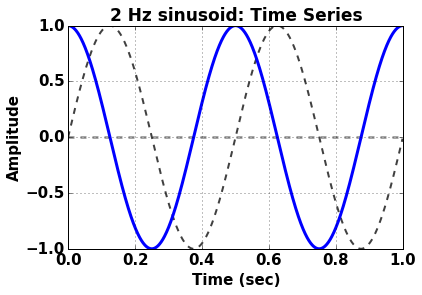

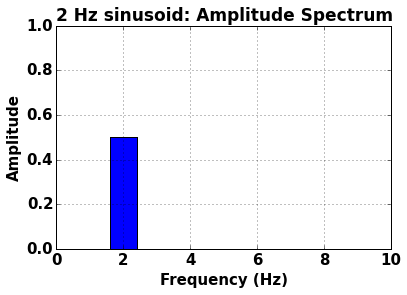

In [10]:
f = 2                       #| frequency
N = 1                       #| N seconds
A = 1                       #| Amplitude
theta = np.pi/2             #| Phase
sr = 1000                   #| sampling rate
maxf = 10                   #| max frequency to plot

FFTex1(f,N,A,theta,sr,maxf)

<h2>FFTex2</h2>
<i>computes/plots series approximation to square wave</i>     

---
<h4>Description:</h4>
This function takes as input the number of harmonics desired to approximate a square wave (i.e. computes the waveform corresponding to a truncated square wave with N-harmonics retained).


<h4>Inputs:</h4>
Nharms: number of harmonics   

 
<h4>Outputs:</h4>
plots time series and amplitude spectrum of both the square wave and the specified truncation

  
<h4>Notes:</h4>
Examples of usage:    
FFTex2(5)

---

In [13]:
def FFTex2(*arg):
    ''' computes/plots series approximation to square wave ...'''
    
    # # Build functions & get spectra
    # -----------------------------------------------------|
    Nharms, = arg
    f = np.r_[1:2*Nharms+1:2]
    N = 1
    plotphase = 0
    theta = 0
    maxf = max([10,2*max(f)+1])
    A = 1
    sr = 1000
    t = np.r_[0:N:1./sr]
    hclr = np.zeros([Nharms,3])
    
    # # make sum of sinusoids
    yA = np.zeros([len(t),Nharms])
    for q in range(Nharms):
        yA[:,q] = 2.*(2.*A)/(np.pi*f[q])*np.sin(2*np.pi*f[q]*t - theta)
        hclr[q,:] = float(q)/Nharms*np.array([0.75,0.75,0.75])
    y = yA.sum(axis=1)
    
    # # make square wave for comparison
    ySQ = np.zeros([len(t)])
    ySQ[0:sr/2] = 1
    ySQ[sr/2:sr] = -1
    
    # # compute spectra
    Ns = len(y)
    yF = np.fft.fft(y)/Ns
    ySQF = np.fft.fft(ySQ)/Ns
    df = sr/Ns
    freqs = np.r_[0:sr:df]
    yS = 2*np.abs(yF)
    ySQS = 2*np.abs(ySQF)
    yT = np.angle(yF)
    
    
    # # Plots
    # -----------------------------------------------------|
 
    # # PLOT SPECTRUM of approximation
    plt.figure(3)
    plt.bar(freqs,yS,align='center')
    plt.rc('font', **{'weight':'bold','size':15})
    plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=15)
    plt.ylabel('Amplitude',fontweight='bold',fontsize=15)
    plt.title('Sum of odd sine series: Amplitude Spectrum' ,fontweight='bold',fontsize=17)
    plt.grid(True)
    plt.axis([0, maxf, 0, 1.5*A])

    # # PLOT analytic SPECTRUM
    plt.figure(4)
    plt.bar(freqs,ySQS,align='center',facecolor=[1,0,0])
    #plt.bar(freqs,yS,align='center',facecolor=[1,0,0])
    plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=15)
    plt.ylabel('Amplitude',fontweight='bold',fontsize=15)
    plt.title('Square wave: Amplitude Spectrum' ,fontweight='bold',fontsize=17)
    plt.grid(True)
    plt.axis([0, maxf, 0, 1.5*A])
    
    # # PLOT TIME SERIES
    plt.figure(5)
    plt.plot([0,N],[0,0],linewidth=3,linestyle='--',color=[0.65,0.65,0.65])
    for q in range(Nharms):
        plt.plot(t,yA[:,q],linewidth=1,linestyle='-',color=hclr[q,:])
    plt.plot(t,ySQ,linewidth=2,color=[1,0,0]); 
    plt.plot(t,y,linewidth=3,color=[0,0,1]);
    plt.rc('font', **{'weight':'bold','size':15})
    plt.xlabel('Time (sec)',fontweight='bold',fontsize=15);
    plt.ylabel('Amplitude',fontweight='bold',fontsize=15);
    plt.title('Sum of odd harmonics: Time Series',fontweight='bold',fontsize=17);
    plt.grid(True)
    plt.axis([0, N, -1.5*A, 1.5*A])
    
    plt.show()
    

<h3>Call FFTex2</h3>

---
In this example we just see how all the harmonics of a function (even a discontinous function) can sum to approximate it. Play around with the number of harmonics (try Nharms = 1, 5, 10, 20).     


---

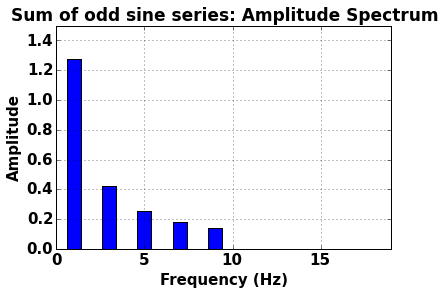

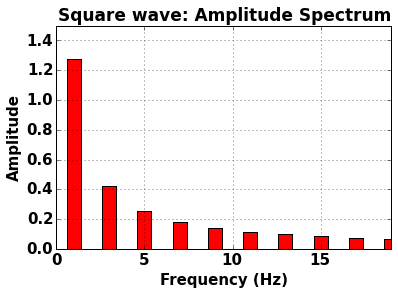

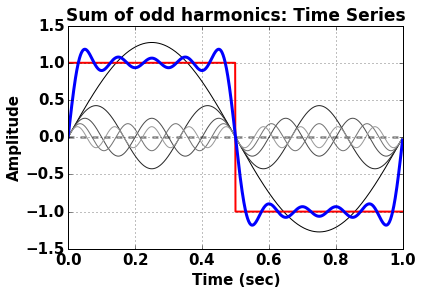

In [14]:
FFTex2(5)

<h2>FFTex3</h2>
<i>visualize effects of sampling rate on aliasing</i>     

---
<h4>Description:</h4>
The purpose of this function is to demonstrate the effects of sampling rate on the Fourier coefficients of sampled sinusoids. It takes as input the frequency of the sinusoid, the sampling rate, and the maximum frequency to display in the power spectrum, and returns plots of the time-series and amplitude spectrum of the original and sampled waveform.   


<h4>Inputs:</h4>
f: frequency of sine wave    
sr: sampling rate    
maxf: max frequency (Hz) to display in spectrum plot     

 
<h4>Outputs:</h4>
plots of the time-series and amplitude spectrum of the original and sampled waveform    

  
<h4>Notes:</h4>
Examples of usage:    
FFTex3(1,50,10)    

---

In [16]:
def FFTex3(*arg):
    '''visualize effects of sampling rate on aliasing'''

    # # Build functions & get spectra
    # -----------------------------------------------------|
    f, sr, maxf = arg
    theta = 0.
    fs = 1000.
    N = 1.
    t = np.r_[0:N:1./fs]
    freqs = np.r_[0:fs:1./N]
    tsr = np.r_[0:N:1./sr]
    df = sr/len(tsr)
    srfreqs = np.r_[0:sr:df]
    y = np.sin(2*np.pi*f*t + theta)
    ysr = np.sin(2*np.pi*f*tsr + theta)
    yF = np.fft.fft(y)/len(y)
    yFsr = np.fft.fft(ysr)/len(ysr)
    yS = np.abs(yF)
    ySsr = np.abs(yFsr)
    ylabstr = 'Amplitude '
    yT = np.angle(yF)
    yTsr = np.angle(yFsr)

    # # Plots
    # -----------------------------------------------------|
    lw = 3.
    stxt = 15.
    ltxt = 17.
    figs = []

    # # Time-series
    ftmp = plt.figure(1); figs.append(ftmp)
    plt.plot([0,N],[0,0],linewidth=lw,linestyle='--',color=[0.65,0.65,0.65])
    plt.plot(t,y,linewidth=lw,color=[0,0,1])
    plt.rc('font', **{'weight':'bold','size':stxt})
    plt.xlabel('Time (sec)',fontweight='bold',fontsize=stxt)
    plt.ylabel('Amplitude',fontweight='bold',fontsize=stxt)
    plt.title('%i Hz sinusoid: Time Series' % f,fontweight='bold',fontsize=ltxt)
    plt.grid(True)
    plt.axis([0, N, -1, 1])
    hp = plt.plot(tsr,ysr,linewidth=2,linestyle='--',marker='o',color=[0,0.9,0])
    hp[0].set(markersize=8,markerfacecolor=[0.5,1,0.5],markeredgecolor=[0.5,0.5,0.5]);
    
    # # spectrum
    ftmp = plt.figure(2); figs.append(ftmp)
    plt.bar(freqs,yS,align='center',facecolor='b')
    plt.rc('font', **{'weight':'bold','size':stxt})
    plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=stxt)
    plt.ylabel('Amplitude',fontweight='bold',fontsize=stxt);
    plt.title('%i Hz sinusoid: Amplitude Spectrum' % f,fontweight='bold',fontsize=ltxt)
    plt.grid(True)
    plt.axis([0, maxf, 0, 1])
    hp = plt.plot(srfreqs,ySsr,marker='o',linewidth=2,linestyle='--',color=[0,0.9,0])
    hp[0].set(markersize=8,markerfacecolor=[0.5,1,0.5],markeredgecolor=[0.5,0.5,0.5]);
    
    plt.show()
    return figs
    

<h3>Call FFTex3</h3>

---
This is another great introductory example to the concept of aliasing. Start of with f = 1, and sr = 50, and then decrease the sampling rate until you are looking at f = 1, sr = 10, where you'll star to see some interesting things. Specifically, at 10 Hz sampling, power is aliased above the nyquist of 5 Hz, which means that the FFT can't really tell the difference between power at 1 Hz and its nyquist compliment of 9 Hz. Similarly (@ 10 Hz sampling rate) for 2 Hz and 8 hz, 3 Hz and 7 Hz, etc. This visualization should shed some light on why that is (hint: set sr = 10, then run at f = 1, and again at f = 9).

---

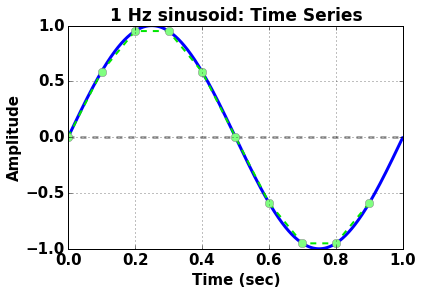

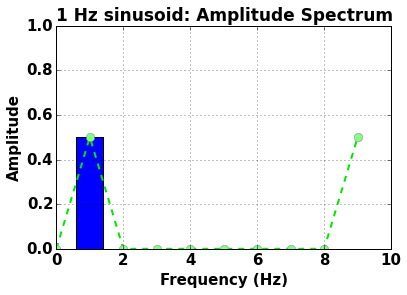

In [17]:
f = 1
sr = 10
figs = FFTex3(f,sr,10)